# Setup

In [1]:
%matplotlib inline
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("NumPy   %s" % np.__version__)
print("Seaborn %s" % sns.__version__)

NumPy   1.12.1
Seaborn 0.7.1


In [3]:
!python --version

Python 2.7.13 :: Anaconda custom (x86_64)


In [4]:
# Set values to expand lists
vals = list(np.geomspace(10, 1000000, num=6, dtype='int'))

# timeit example
[timeit.timeit('xrange(%d)' % num) for num in vals]

[0.19082307815551758,
 0.17383098602294922,
 0.1741929054260254,
 0.1701679229736328,
 0.1715860366821289,
 0.1963939666748047]

---

# Plot Functions

In [5]:
def my_plot1(vals, slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    plt.plot(np.log10(vals), slow_times);
    plt.plot(np.log10(vals), fast_times);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(range(1,6));
    plt.legend(['slow', 'fast'])

In [6]:
def my_plot2(slow_times, fast_times, title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(6)                
    width = 0.35
    # Plots
    bar1 = ax.bar(ind, slow_times, width, color='darkblue', log=True)
    bar2 = ax.bar(ind+width, fast_times, width, color='darkgreen', log=True)
    ax.legend( (bar1[0], bar2[0]), ('slow', 'fast') );
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

---

# Looping Over A Collection

In [7]:
# Looping over a collection
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in xrange(len(colors))]        
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in colors]

Bad
The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.29 µs per loop
10000 loops, best of 3: 23.5 µs per loop
1000 loops, best of 3: 227 µs per loop
100 loops, best of 3: 2.19 ms per loop
10 loops, best of 3: 21.4 ms per loop
1 loop, best of 3: 231 ms per loop

Better
The slowest run took 4.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.2 µs per loop
The slowest run took 7.42 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.7 µs per loop
10000 loops, best of 3: 119 µs per loop
1000 loops, best of 3: 1.34 ms per loop
100 loops, best of 3: 13.3 ms per loop
10 loops, best of 3: 159 ms per loop


In [8]:
def slow_collection():
    out = [timeit.timeit("[colors[i] for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection():
    out = [timeit.timeit("[color for color in colors]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [9]:
sc = slow_collection()
fc = fast_collection()

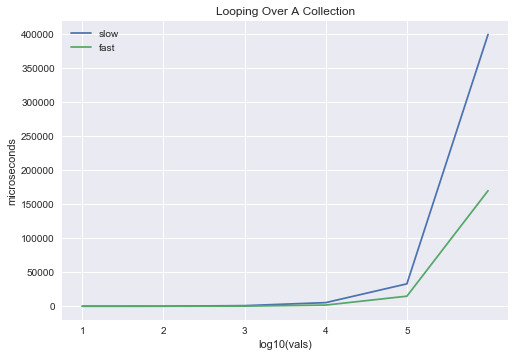

In [10]:
my_plot1(vals, sc, fc, 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="microseconds")

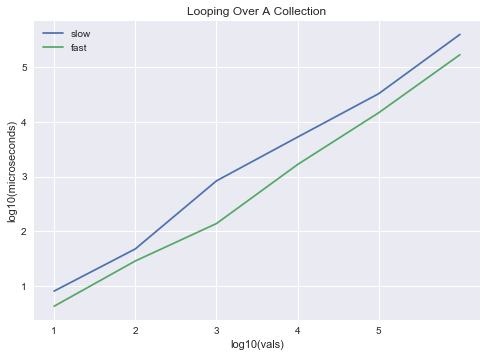

In [11]:
my_plot1(vals, np.log10(sc), np.log10(fc), 
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

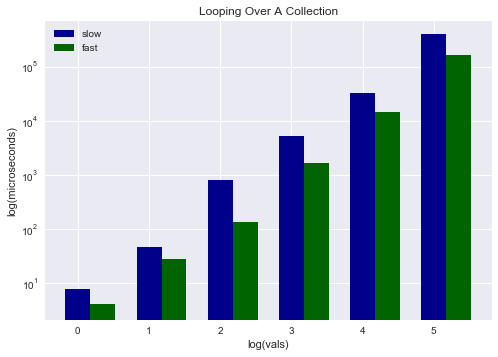

In [12]:
my_plot2(sc, fc, title="Looping Over A Collection", 
         xlabel='log(vals)', 
         ylabel="log(microseconds)")

---

# Sorting Lists

In [13]:
# LEGACY CODE

# Sorting lists
for choice in ['xrange', 'reversed']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in xrange(len(colors)-1, -1, -1)]     
    else:
        print('\nreversed')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in reversed(colors)]

xrange
The slowest run took 9.99 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.19 µs per loop
10000 loops, best of 3: 22.2 µs per loop
1000 loops, best of 3: 195 µs per loop
100 loops, best of 3: 2.07 ms per loop
10 loops, best of 3: 21 ms per loop
1 loop, best of 3: 210 ms per loop

reversed
100000 loops, best of 3: 2.37 µs per loop
100000 loops, best of 3: 15.3 µs per loop
10000 loops, best of 3: 135 µs per loop
1000 loops, best of 3: 1.34 ms per loop
100 loops, best of 3: 13.3 ms per loop
10 loops, best of 3: 145 ms per loop


In [14]:
def slow_sort():
    out = [timeit.timeit("[colors[i] for i in range(len(colors)-1, -1, -1)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_sort():
    out = [timeit.timeit("[color for color in reversed(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [15]:
ss = slow_sort()
fs = fast_sort()

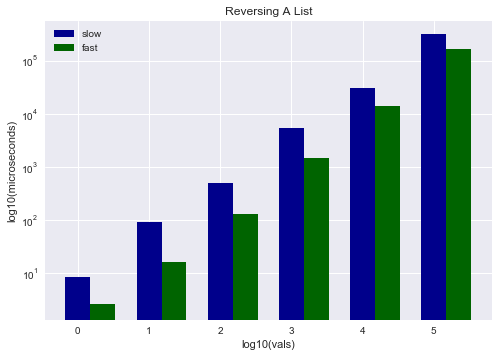

In [16]:
my_plot2(ss, fs, 
        title="Reversing A List", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over A Collection & Indices

In [17]:
# LEGACY CODE

# Looping over a collection and indices
for choice in ['xrange', 'enumerate']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i in xrange(len(colors))]
        
    else:
        print('\nenumerate')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i, color in enumerate(colors)]

xrange
The slowest run took 4.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.25 µs per loop
10000 loops, best of 3: 33.6 µs per loop
1000 loops, best of 3: 339 µs per loop
100 loops, best of 3: 4.37 ms per loop
10 loops, best of 3: 56.4 ms per loop
1 loop, best of 3: 589 ms per loop

enumerate
100000 loops, best of 3: 4.94 µs per loop
10000 loops, best of 3: 46.1 µs per loop
1000 loops, best of 3: 441 µs per loop
100 loops, best of 3: 4.81 ms per loop
10 loops, best of 3: 69.2 ms per loop
1 loop, best of 3: 725 ms per loop


In [18]:
def slow_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i in xrange(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i, color in enumerate(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [19]:
sci = slow_collection_indices()
fci = fast_collection_indices()

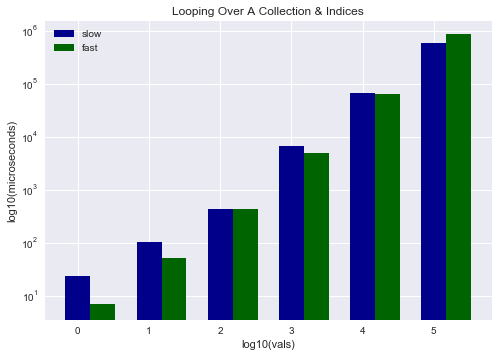

In [20]:
my_plot2(sci, fci, 
        title="Looping Over A Collection & Indices", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

---

# Looping Over Two Collections

In [21]:
# LEGACY CODE

# Loop over two collections
for choice in ['xrange', 'zip']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(names[i], colors[i]) for i in xrange(min(len(names), len(colors)))]
    else:
        print('\nzip')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(name, color) for name, color in zip(names, colors)]

xrange
The slowest run took 8.33 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.64 µs per loop
10000 loops, best of 3: 42.5 µs per loop
1000 loops, best of 3: 526 µs per loop
100 loops, best of 3: 5.26 ms per loop
10 loops, best of 3: 61.6 ms per loop
1 loop, best of 3: 650 ms per loop

zip
100000 loops, best of 3: 5.47 µs per loop
10000 loops, best of 3: 45.3 µs per loop
1000 loops, best of 3: 479 µs per loop
100 loops, best of 3: 6.67 ms per loop
10 loops, best of 3: 90.9 ms per loop
1 loop, best of 3: 954 ms per loop


---

# Appending Strings

In [22]:
# LEGACY CODE

# Appending Strings
my_string = ""
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('+=')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time for item in mylist: my_string += item
    else:
        print('\n.join')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time my_string = "".join([item for item in mylist])

+=
CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 52 µs
CPU times: user 509 µs, sys: 1 µs, total: 510 µs
Wall time: 513 µs
CPU times: user 6.44 ms, sys: 179 µs, total: 6.62 ms
Wall time: 8.97 ms
CPU times: user 60.2 ms, sys: 1.53 ms, total: 61.7 ms
Wall time: 64.9 ms
CPU times: user 613 ms, sys: 10.6 ms, total: 624 ms
Wall time: 651 ms
CPU times: user 6.08 s, sys: 98.1 ms, total: 6.18 s
Wall time: 6.41 s

.join
CPU times: user 68 µs, sys: 1.7 ms, total: 1.77 ms
Wall time: 1.77 ms
CPU times: user 225 µs, sys: 152 µs, total: 377 µs
Wall time: 274 µs
CPU times: user 2.06 ms, sys: 552 µs, total: 2.61 ms
Wall time: 2.3 ms
CPU times: user 19.6 ms, sys: 1.47 ms, total: 21.1 ms
Wall time: 21.2 ms
CPU times: user 193 ms, sys: 17.8 ms, total: 211 ms
Wall time: 212 ms
CPU times: user 2.19 s, sys: 190 ms, total: 2.38 s
Wall time: 2.53 s


---

# Using Standard Library

In [23]:
# Standard Library

for choice in ['listexp', 'map']:   
    if choice is 'listexp':
        print('listexp')
        newlist = []
        for val in vals:
            %timeit [np.cumsum(item) for item in xrange(val)]
    else:
        print('\nmap')
        newlist = []
        for val in vals:
            %timeit newlist = map(np.cumsum, xrange(val))

listexp
10000 loops, best of 3: 62.4 µs per loop
1000 loops, best of 3: 635 µs per loop
100 loops, best of 3: 6.08 ms per loop
10 loops, best of 3: 71.8 ms per loop
1 loop, best of 3: 630 ms per loop
1 loop, best of 3: 6.01 s per loop

map
10000 loops, best of 3: 63.2 µs per loop
1000 loops, best of 3: 561 µs per loop
100 loops, best of 3: 6.01 ms per loop
10 loops, best of 3: 59.6 ms per loop
1 loop, best of 3: 539 ms per loop
1 loop, best of 3: 5.46 s per loop


---

# Listexp vs Genexp

In [24]:
# listexp vs genexp

for choice in ['listexp', 'genexp']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in xrange(val)] # list expression
    else:
        print('\ngenexp')
        for val in vals:
            %timeit (np.cumsum(item) for item in xrange(val)) # generator expression

listexp
10000 loops, best of 3: 58.1 µs per loop
1000 loops, best of 3: 583 µs per loop
100 loops, best of 3: 5.72 ms per loop
10 loops, best of 3: 56 ms per loop
1 loop, best of 3: 568 ms per loop
1 loop, best of 3: 5.64 s per loop

genexp
The slowest run took 5.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 569 ns per loop
The slowest run took 5.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 558 ns per loop
1000000 loops, best of 3: 565 ns per loop
1000000 loops, best of 3: 590 ns per loop
The slowest run took 5.16 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 601 ns per loop
The slowest run took 6.72 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 603 ns per loop


---

# Dots

In [25]:
# Dots matter (marginally)
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        newlist = []
        for val in vals:
            %timeit newlist.append(np.cumsum(val))
    else:
        print('\nBetter')
        newlist = []
        cumsum = np.cumsum
        append = newlist.append
        for val in vals:
            %timeit append(cumsum(val))

Bad
The slowest run took 10.53 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.38 µs per loop
The slowest run took 5.54 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.37 µs per loop
The slowest run took 5.77 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.44 µs per loop
The slowest run took 8.02 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.38 µs per loop
The slowest run took 8.41 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.16 µs per loop
The slowest run took 4.96 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.21 µs per loop

Better
The slowest run took 9.00 t

---
**Note: Mileage will vary with Python 3. Many performance enhancements were made like converting range to a generator. See Py35 notebook for differences.**

---

## Links
[4 Performance Optimization Tips For Faster Python Code](http://blog.hackerearth.com/4-Performance-Optimization-Tips-Faster-Python-Code)  
[PythonSpeed Performance Tips](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)  
[6 Python Performance Tips](https://dzone.com/articles/6-python-performance-tips)